Machines understand the language of numbers and not texts, so after preprocessing the text we need to convert them into vectors so that they can be trained with the help of our models.

There ar a various ways of converting text into vectors, some of them are listed below.
* One Hot Encoding
* Bag of Words (BoW)
* TF-IDF
* Word2Vec
* Avg Word2Vec

Amongst these, the most common are BoW, TF-IDF and Word2Vec. We will see the implementation of them in this and/or a few more notebooks.
But first lets see that WHY One Hot Encoding is not used so much.

# Problems with One Hot Encoding

If you come from a background of basic ML algorithms, you may already know what one hot encoding is. It works in a similar way in NLP.

In one-hot encoding, each word can be represented as a single compressed vector, in which the length of a vector is equal to the size of the vocabulary.

For eg.

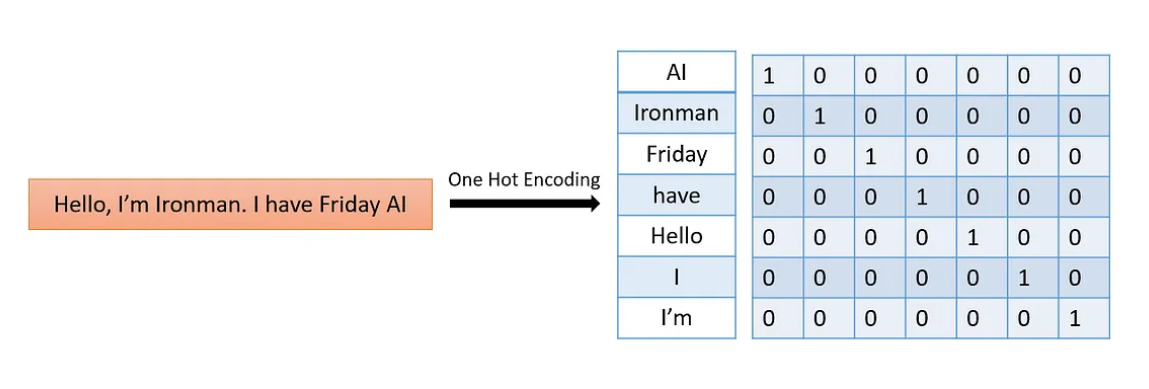

As you can see, words from the given sentence is converted into a vocabulary and each word from that vocabulary is created into a vector with size of the vocabulary. Many of you must have seen the problem here itself. But if not let me explain

A very big downside of using one hot encoding is that, it may not always create a vector of the required size, and as we all know to train a machine learning model, all the inputs must be of the **same** shape

Let me give you an example. Let's assume there are three sentences
1. The food is good.
2. The food is bad.
3. Burger is amazing.

Now, to perform one hot encoding, we first need to create a `vocabulary (unique words)` out of these three sentences
So, our vocabulary (v) will consist

`v = ['The', 'food', 'is', 'good', 'bad', 'burger', 'amazing']`

Now, as seen in the above image, lets assign each word a vector

1. The ---> [1000000]
2. food ---> [0100000]
3. is ---> [0010000]
4. good ---> [0001000]
5. bad ---> [0000100]
6. burger ---> [0000010]
7. amazing ---> [0000001]

Now, lets encode the first sentence using these vectors.

`The food is good ---> [[1000000],
                       [0100000],
                       [0010000],
                       [0001000]]`

As you can see the sentences has been converted into a 2D vector of size `(4, 7)`

Similary, the second sentence can be converted as follows

`The food is bad ---> [[1000000],
                       [0100000],
                       [0010000],
                       [0000100]]`,
`size (4, 7)`

🤔hmm, i dont see the problem of different size which i mentioned earlier, so to demonstrate that let's now convert sentence 3 into vectors

`burger is amazing ---> [[0000010], [0010000], [0000001]], size (3, 7)`

As you can see, it has been converted into vectors..but of a different size, which as said earlier cannot be passed as a input to our model

This was ONE of the major disadvantage that follows with one hot encoding, the rest disadvantages include:
* Creates a [sparse matrix](https://en.wikipedia.org/wiki/Sparse_matrix), which further leads to overfitting.
* The semantic meaning of words is not captured
* Test data may not have the same set of vocabulary, hence leading to the ignorance of that word which may be important

# Bag of Words (BoW)

Let's start directly with an example, assuming we have three sentences
1. He is a good boy
2. She is a good girl
4. Boy and girl are good

Unlike one hot encoding, here we first need to preprocess the text (converting into loer case and removing the stop words)
If you dont know what stopwords are or how to preprocess the tex, you can refer my previous notebooks ;)

Anyways after preprocessing, our sentences are as follows:
1. good boy
2. good girl
3. boy girl good

The next step is to create a vocabulary with respective frequencies and arranging them in descending order

`V = ['good', 'boy', 'girl'], with frequencies = [3, 2, 2] respectively`

Now lets encode the three sentences into vectors
1. `good boy ---> [1, 1, 0] (as there is no girl in here)`
2. `good girl ---> [1, 0, 1]`
3. `boy girl good ---> [1, 1, 1]`

Now, if you may have noticed that BoW solves the most **important** problem that we discussed in the previous section.
Yes, you guessed it right BoW encodes all the sentences into `equal sizes` hence not giving us a problem.
However..there are still a few disadvantages corelated with BoW
1. Same as before..creates a sparse matrix
2. The ordering of words change, as we are arranging the vocabulary in descending order
3. Test data may contain words which are out of our vocabulary

In [ ]:
corpus = """Natural Language Processing or NLP is a branch of artificial intelligence that focuses on how computers understand and interact with human language.
It involves teaching machines to read write and comprehend text in a way that is similar to how people do.
NLP is used in many applications such as chatbots translation services and voice recognition systems.
By analyzing language patterns and meanings NLP helps improve communication between humans and machines.
This technology continues to evolve making it easier for people to engage with digital devices and access information."""

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
sentences = sent_tokenize(corpus)
for i in range(len(sentences)):
  words = word_tokenize(sentences[i])
  words = [word for word in words if word not in set(stopwords.words('english'))]
  sentences[i] = ' '.join(words)

In [ ]:
sentences

['Natural Language Processing NLP branch artificial intelligence focuses computers understand interact human language .',
 'It involves teaching machines read write comprehend text way similar people .',
 'NLP used many applications chatbots translation services voice recognition systems .',
 'By analyzing language patterns meanings NLP helps improve communication humans machines .',
 'This technology continues evolve making easier people engage digital devices access information .']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary = True)
BoW = cv.fit_transform(sentences)

In [ ]:
BoW

<5x51 sparse matrix of type '<class 'numpy.int64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [ ]:
cv.vocabulary_

{'natural': 31,
 'language': 26,
 'processing': 35,
 'nlp': 32,
 'branch': 4,
 'artificial': 3,
 'intelligence': 22,
 'focuses': 16,
 'computers': 9,
 'understand': 46,
 'interact': 23,
 'human': 18,
 'it': 25,
 'involves': 24,
 'teaching': 41,
 'machines': 27,
 'read': 36,
 'write': 50,
 'comprehend': 8,
 'text': 43,
 'way': 49,
 'similar': 39,
 'people': 34,
 'used': 47,
 'many': 29,
 'applications': 2,
 'chatbots': 6,
 'translation': 45,
 'services': 38,
 'voice': 48,
 'recognition': 37,
 'systems': 40,
 'by': 5,
 'analyzing': 1,
 'patterns': 33,
 'meanings': 30,
 'helps': 17,
 'improve': 20,
 'communication': 7,
 'humans': 19,
 'this': 44,
 'technology': 42,
 'continues': 10,
 'evolve': 15,
 'making': 28,
 'easier': 13,
 'engage': 14,
 'digital': 12,
 'devices': 11,
 'access': 0,
 'information': 21}

In [ ]:
BoW.toarray()

array([[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0]])

#TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
TFIDF = tf.fit_transform(sentences)

In [ ]:
TFIDF

<5x51 sparse matrix of type '<class 'numpy.float64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [ ]:
tf.vocabulary_

{'natural': 31,
 'language': 26,
 'processing': 35,
 'nlp': 32,
 'branch': 4,
 'artificial': 3,
 'intelligence': 22,
 'focuses': 16,
 'computers': 9,
 'understand': 46,
 'interact': 23,
 'human': 18,
 'it': 25,
 'involves': 24,
 'teaching': 41,
 'machines': 27,
 'read': 36,
 'write': 50,
 'comprehend': 8,
 'text': 43,
 'way': 49,
 'similar': 39,
 'people': 34,
 'used': 47,
 'many': 29,
 'applications': 2,
 'chatbots': 6,
 'translation': 45,
 'services': 38,
 'voice': 48,
 'recognition': 37,
 'systems': 40,
 'by': 5,
 'analyzing': 1,
 'patterns': 33,
 'meanings': 30,
 'helps': 17,
 'improve': 20,
 'communication': 7,
 'humans': 19,
 'this': 44,
 'technology': 42,
 'continues': 10,
 'evolve': 15,
 'making': 28,
 'easier': 13,
 'engage': 14,
 'digital': 12,
 'devices': 11,
 'access': 0,
 'information': 21}

In [ ]:
TFIDF.toarray()

array([[0.        , 0.        , 0.        , 0.27679517, 0.27679517,
        0.        , 0.        , 0.        , 0.        , 0.27679517,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.27679517, 0.        , 0.27679517, 0.        ,
        0.        , 0.        , 0.27679517, 0.27679517, 0.        ,
        0.        , 0.4466332 , 0.        , 0.        , 0.        ,
        0.        , 0.27679517, 0.18537295, 0.        , 0.        ,
        0.27679517, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.27679517, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.31156077, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.     